In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo y pasarlo a DF
df = pd.read_csv("../data/raw/iu.txt")

# Mostrar Df
df

,Ano,Mes,Dia,Hora,U,V,UI
0,2010,3,4,0,-3.9572,-5.92480,711.090
1,2010,3,4,6,-5.9352,-4.12930,502.940
2,2010,3,4,12,-3.9585,-6.86520,916.470
3,2010,3,4,18,-6.4998,-5.80600,852.400
4,2010,3,5,0,-8.3075,-2.84500,420.840
...,...,...,...,...,...,...,...
13141,2019,3,2,18,10.7310,12.92100,-3655.800
13142,2019,3,3,0,14.1570,15.56000,-5514.200
13143,2019,3,3,6,19.9210,21.04900,-10276.000
13144,2019,3,3,12,15.1950,9.73300,-2958.600


In [3]:
df = df.dropna()
df

,Ano,Mes,Dia,Hora,U,V,UI
0,2010,3,4,0,-3.9572,-5.92480,711.090
1,2010,3,4,6,-5.9352,-4.12930,502.940
2,2010,3,4,12,-3.9585,-6.86520,916.470
3,2010,3,4,18,-6.4998,-5.80600,852.400
4,2010,3,5,0,-8.3075,-2.84500,420.840
...,...,...,...,...,...,...,...
13141,2019,3,2,18,10.7310,12.92100,-3655.800
13142,2019,3,3,0,14.1570,15.56000,-5514.200
13143,2019,3,3,6,19.9210,21.04900,-10276.000
13144,2019,3,3,12,15.1950,9.73300,-2958.600


In [4]:

# Construir una cadena de fecha en el formato correcto (año-mes-día)
df['Fecha'] = df['Ano'].astype(str) + '-' + df[' Mes'].astype(str) + '-' + df[' Dia'].astype(str)

# Convertir la cadena de fecha a objeto de fecha y hora
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Agrupar por día y realizar operaciones, como promedio de U, V, UI
resultado = df.groupby('Fecha').agg({
    ' U': 'mean',
    ' V': 'mean',
    ' UI': 'mean'
})


C:\Users\rmarc\AppData\Local\Temp\ipykernel_19120\2435663854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha'] = df['Ano'].astype(str) + '-' + df[' Mes'].astype(str) + '-' + df[' Dia'].astype(str)
C:\Users\rmarc\AppData\Local\Temp\ipykernel_19120\2435663854.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha'] = pd.to_datetime(df['Fecha'])


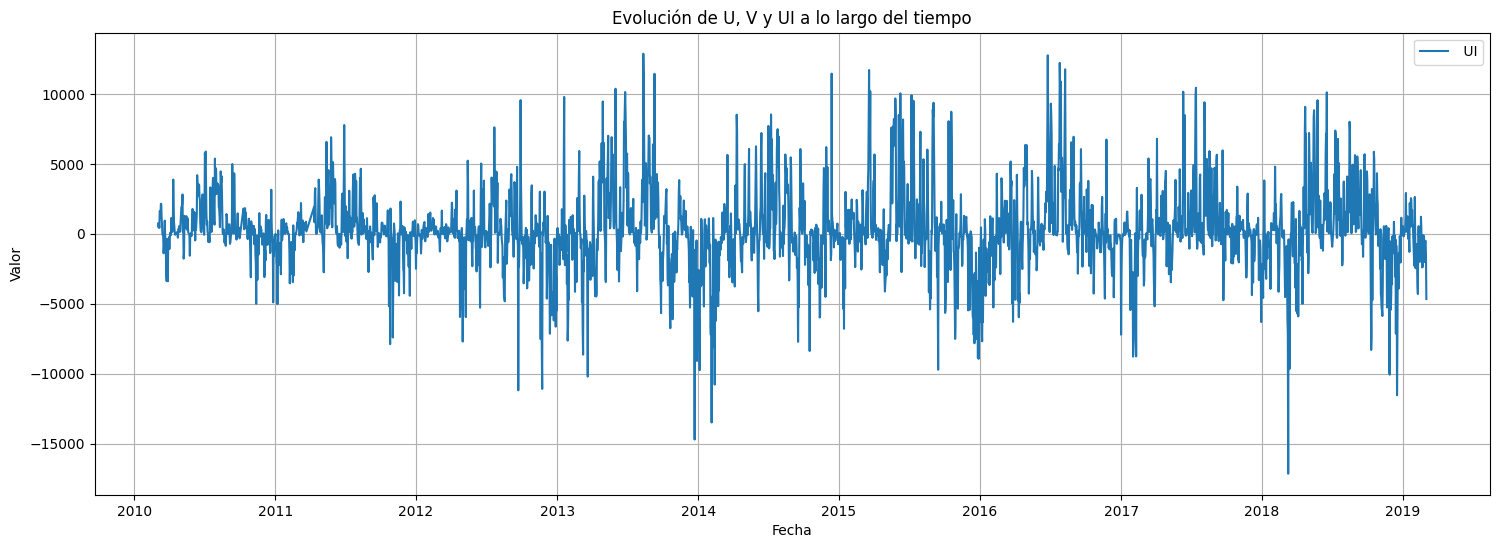

In [5]:
# Crear el gráfico
plt.figure(figsize=(18, 6))

# Graficar las columnas U, V y UI

plt.plot(resultado.index, resultado[' UI'], label=' UI')

# Agregar título y etiquetas
plt.title('Evolución de U, V y UI a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()